In [1]:
import json
import os.path
import sqlite3

import numpy as np
from matplotlib import pyplot as plt

In [2]:
# TABLE prior_blurr_sensitivity_experiment(prior_val, std, img_index, start_time, end_time)

In [3]:
# best run
mat_version = 9
# with 100 images in source folder
mat_params_path = f'results/prior_blurr_sensitivity_experiment/custom_material_prior/version_{mat_version}/params.json'
with open(mat_params_path, 'r') as fp:
        mat_params_dict = json.load(fp)
mat_value_db_path = os.path.join(mat_params_dict['result_dir'], 'values.db')
mat_connection = sqlite3.connect(mat_value_db_path)
mat_cursor = mat_connection.cursor()

In [20]:
# best run
but_version = 1
# with 100 images in source folder
but_params_path = f'results/prior_blurr_sensitivity_experiment/custom_butterfly_prior/version_{but_version}/params.json'
with open(but_params_path, 'r') as fp:
        but_params_dict = json.load(fp)
but_value_db_path = os.path.join(but_params_dict['result_dir'], 'values.db')
but_connection = sqlite3.connect(but_value_db_path)
but_cursor = but_connection.cursor()

In [21]:
mat_cursor.execute("SELECT mean, std from variance_data")
mat_val, mat_std = zip(*mat_cursor.fetchall())

In [22]:
but_cursor.execute("SELECT mean, std from variance_data")
but_val, but_std = zip(*but_cursor.fetchall())

In [23]:
#TABLE flow_model_train_loss(step, loss)
mat_loss_version = 3
mat_loss_loss_db_path = f'results/patch_nr/custom_patch_nr/version_{mat_loss_version}/loss.db'
mat_loss_connection = sqlite3.connect(mat_loss_loss_db_path)
mat_loss_cursor = mat_loss_connection.cursor()
mat_loss_cursor.execute('SELECT * from flow_model_validation_loss')
mat_loss_val_step, mat_loss_val_loss =zip(*mat_loss_cursor.fetchall())

In [24]:
#TABLE flow_model_train_loss(step, loss)
version = 1
loss_db_path = f'results/patch_nr/butterfly/version_{version}/loss.db'
connection = sqlite3.connect(loss_db_path)
cursor = connection.cursor()
cursor.execute('SELECT * from flow_model_validation_loss')
val_step, val_loss =zip(*cursor.fetchall())

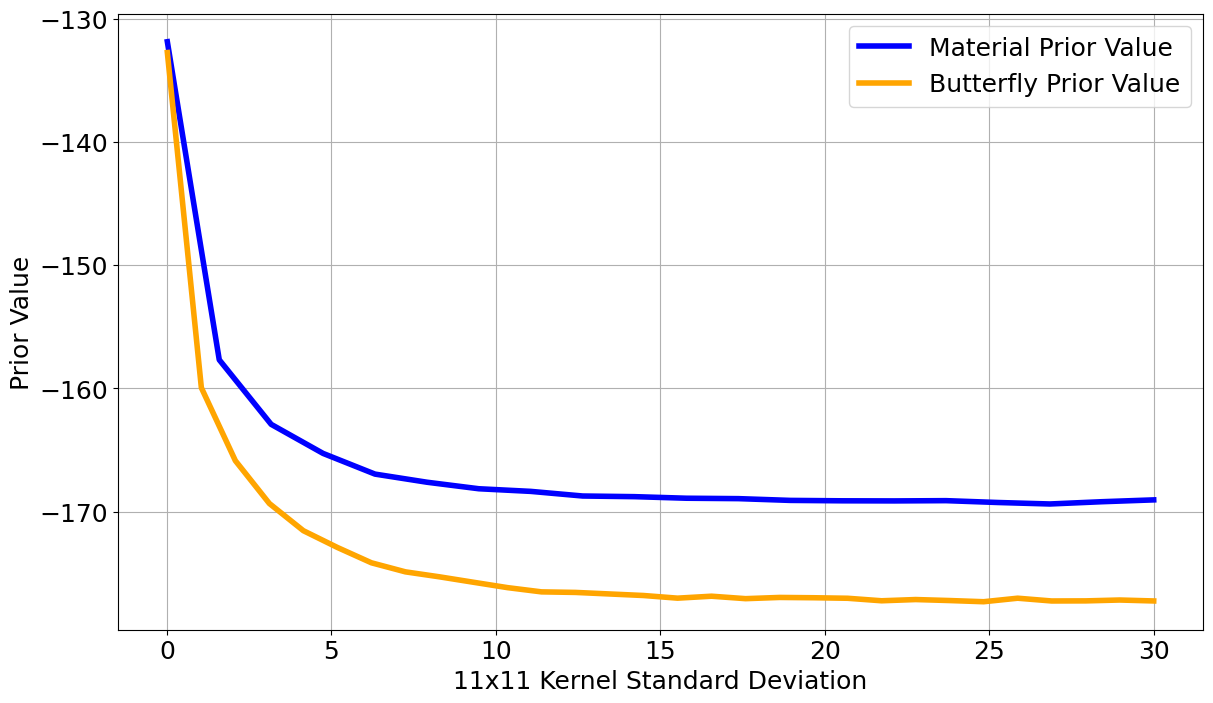

In [25]:
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(14, 8))
plt.plot(mat_std, mat_val, label='Material Prior Value', linestyle='-', linewidth=4, color='blue')
plt.plot(but_std, but_val, label='Butterfly Prior Value', linestyle='-', linewidth=4, color='orange')
#plt.axhline(np.mean(mat_loss_val_loss), label='Material Loss Mean', linewidth=4, color='skyblue')
#plt.axhline(np.mean(mat_loss_val_loss), label='Butterfly Loss Mean', linewidth=4, color='moccasin')
#plt.fill_between(std, mins, maxes, color='cornflowerblue', alpha=0.2, label='Min-Max Range')
#plt.scatter(scatter_steps, scatter_values, color='cornflowerblue', marker='o', s=3, label='prior values')
plt.legend()
plt.xlabel('11x11 Kernel Standard Deviation')
plt.ylabel('Prior Value')
#plt.title('Prior behavior for blurr kernel with increasing std')
plt.grid(True)
plt.show()